Analisis Exploratorio de Datos Telecomunicaciones

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Los archivos furon descargados de la pagina https://datosabiertos.enacom.gob.ar/dashboards/20000/acceso-a-internet/

In [3]:
I_tecyloc = pd.read_csv('F:\PI_2\DATA_PI2\AccesosaInternetfijoportecnologiaylocalidad_2791751681952123859.csv')
I_portec= pd.read_csv('F:\PI_2\DATA_PI2\Internet_Accesos-por-tecnologia.csv')
I_BaF = pd.read_csv('F:\PI_2\DATA_PI2\Internet_BAF.csv')
I_loc_conint = pd.read_csv('F:\PI_2\DATA_PI2\Listadodelocalidadesconconectividadainternet_2750221681952192754.csv')

In [9]:
I_BaF.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,3,11.078.691,12.437,11.091.128,Jul-Sept 2022
1,2022,2,10.946.248,12.436,10.958.684,Abr-Jun 2022
2,2022,1,10.611.390,12.619,10.624.009,Ene-Mar 2022
3,2021,4,10.476.933,12.861,10.489.794,Oct-Dic 2021
4,2021,3,10.075.184,10.357,10.085.541,Jul-Sept 2021


In [10]:
I_loc_conint.head()

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,--,--,--,--,SI,SI,--,--,--
1,BUENOS AIRES,Bahía Blanca,Villa Espora,--,--,--,--,--,--,--,--,--
2,BUENOS AIRES,Balcarce,Balcarce,SI,SI,SI,SI,SI,SI,SI,SI,--
3,BUENOS AIRES,Balcarce,Los Pinos,--,--,--,--,--,--,SI,SI,--
4,BUENOS AIRES,Balcarce,Napaleofú,--,--,--,SI,SI,SI,SI,SI,--


Analisis de Accesosa Internet por tecnologia y localidad

In [3]:
I_tecyloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3142 non-null   object 
 1   Partido        3142 non-null   object 
 2   Localidad      3142 non-null   object 
 3   Link Indec     3142 non-null   object 
 4   ADSL           3142 non-null   object 
 5   CABLEMODEM     3142 non-null   object 
 6   DIAL UP        3142 non-null   object 
 7   FIBRA OPTICA   3142 non-null   object 
 8   OTROS          3142 non-null   object 
 9   SATELITAL      3142 non-null   object 
 10  WIMAX          3142 non-null   object 
 11  WIRELESS       3142 non-null   object 
 12  Total general  3142 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 343.8+ KB


In [126]:
#convierto todo a minusculas para trabajar con mas comodidad
I_tecyloc = I_tecyloc.apply(lambda x: x.astype(str).str.lower() if x.dtype == 'object' else x)

In [127]:
#cambio tambien los nombres de columnas
I_tecyloc= I_tecyloc.rename(columns=lambda x: x.lower())

In [128]:
I_tecyloc.describe(exclude='number')

,provincia,partido,localidad,link indec,adsl,cablemodem,dial up,fibra optica,otros,satelital,wimax,wireless,total general
count,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142
unique,24,432,2850,2718,724,693,86,706,219,24,12,606,1348
top,buenos aires,general roca,otros,sin datos,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,1
freq,716,57,69,72,2016,2295,2760,1743,2537,2089,3131,934,193


Se puede observar el analisis en 24 provincias, donde la mayor concentranción esta en Bs. As, en el partido de gral. Roca donde el Internet que mas utilizan es adsl.

In [125]:
#analizo unnamed 
I_tecyloc['unnamed: 13'].describe()

KeyError: 'unnamed: 13'

In [65]:
I_tecyloc['unnamed: 13'].shape

(3142,)

In [66]:
I_tecyloc['unnamed: 13'].isna().sum()

3142

In [69]:
#considero irrelevante ya que todos sus valores son nan, por lo tanto la borro
I_tecyloc = I_tecyloc.drop(columns= 'unnamed: 13')

In [70]:
I_tecyloc.head(2)

,provincia,partido,localidad,link indec,adsl,cablemodem,dial up,fibra optica,otros,satelital,wimax,wireless,total general,adls,total_tecnologias
0,buenos aires,25 de mayo,25 de mayo,6854100,873,4704.0,0.0,2.0,- 0,975.0,0.0,664.0,7218.0,873.0,8734704.00.02.0- 0975.00.0664.0
1,buenos aires,25 de mayo,del valle,6854020,181,0.0,0.0,0.0,10,1.0,0.0,0.0,192.0,181.0,1810.00.00.0101.00.00.0


Analisis Para variables numericas de I_tecyloc(acceso internet por localidad) :

Transformo las columnas que contienen valores numericos porque estan como 'o'. Estan columnas son: link indec, cablemodem,	dial up,	fibra optica,	otros,	satelital,	wimax,	wireless,	total general

In [7]:
I_tecyloc['adsl'] = I_tecyloc['adsl'].replace('- 0','0')

In [8]:
I_tecyloc['adls'] = I_tecyloc['adsl'].astype(float)

In [14]:
I_tecyloc['cablemodem'] = I_tecyloc['cablemodem'].replace('- 0','0')
I_tecyloc['cablemodem'] = I_tecyloc['cablemodem'].str.replace('.','')
I_tecyloc['cablemodem'] = I_tecyloc['cablemodem'].astype(float)

C:\Users\alumno\AppData\Local\Temp\ipykernel_5480\190769991.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  I_tecyloc['cablemodem'] = I_tecyloc['cablemodem'].str.replace('.','')


In [17]:
I_tecyloc['dial up'] = I_tecyloc['dial up'].replace('- 0','0')
I_tecyloc['dial up'] = I_tecyloc['dial up'].astype(float)

In [19]:
I_tecyloc['fibra optica'] = I_tecyloc['fibra optica'].replace('- 0','0')
I_tecyloc['fibra optica'] = I_tecyloc['fibra optica'].astype(float)

In [21]:
I_tecyloc['satelital'] = I_tecyloc['satelital'].replace('- 0','0')
I_tecyloc['satelital'] = I_tecyloc['satelital'].astype(float)

In [23]:
I_tecyloc['wimax'] = I_tecyloc['wimax'].replace('- 0','0')
I_tecyloc['wimax'] = I_tecyloc['wimax'].astype(float)

In [25]:
I_tecyloc['wireless'] = I_tecyloc['wireless'].replace('- 0','0')
I_tecyloc['wireless'] = I_tecyloc['wireless'].astype(float)

In [26]:
I_tecyloc['total general'] = I_tecyloc['total general'].replace('- 0','0')
I_tecyloc['total general'] = I_tecyloc['total general'].str.replace('.', '')
I_tecyloc['total general'] = I_tecyloc['total general'].astype(float)

C:\Users\alumno\AppData\Local\Temp\ipykernel_5480\1458107848.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  I_tecyloc['total general'] = I_tecyloc['total general'].str.replace('.', '')


In [55]:
# Obtener estadísticas descriptivas de todas las columnas numéricas
stats = I_tecyloc[['link indec', 'adsl', 'cablemodem',
       'dial up', 'fibra optica', 'otros', 'satelital', 'wimax', 'wireless', 'adls', ]].describe(include=[np.number])

# Obtener la fila correspondiente al valor máximo de cada columna
max_values = stats.loc['max']

# Obtener el nombre de la columna con el valor máximo
max_column = max_values.idxmax()

print("La columna con el valor máximo es:", max_column)


La columna con el valor máximo es: adls


La tecnologia mas utilizda en el pais es 'adls'

C:\Users\alumno\AppData\Local\Temp\ipykernel_5480\621544461.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  por_provincia = I_tecyloc.groupby('provincia').sum()#['total_tecnologias']


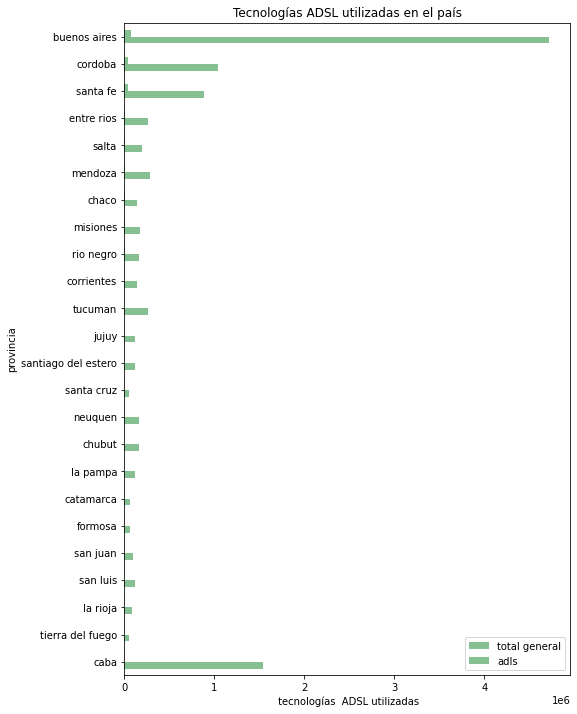

In [71]:

# Obtener estadísticas descriptivas de todas las columnas numéricas
stats = I_tecyloc[['link indec', 'adsl', 'cablemodem',
       'dial up', 'fibra optica', 'otros', 'satelital', 'wimax', 'wireless', 'adls', ]].describe(include=[np.number])

# Obtener la fila correspondiente al valor máximo de cada columna
max_values = stats.loc['max']

# Obtener el nombre de la columna con el valor máximo
max_column = max_values.idxmax()

#print("La columna con el valor máximo es:", max_column)


# agrupar por provincia y sumar la cantidad total de tecnologías utilizadas en cada provincia
por_provincia = I_tecyloc.groupby('provincia').sum()#['total_tecnologias']

# ordenar las provincias por la cantidad total de tecnologías utilizadas
por_provincia = por_provincia.sort_values(max_column)

# trazar un gráfico de barras para mostrar las cantidades
por_provincia.plot(kind='barh', figsize=(8, 12), color='#86bf91', zorder=2)

# añadir etiquetas y título
plt.xlabel(' tecnologías  ADSL utilizadas')
plt.title('Tecnologías ADSL utilizadas en el país')

# mostrar el gráfico
plt.show()


Para ver la distribución de una variable categórica en un DataFrame, se puede utilizar el método "value_counts" de pandas o "countplot" de seaborn:

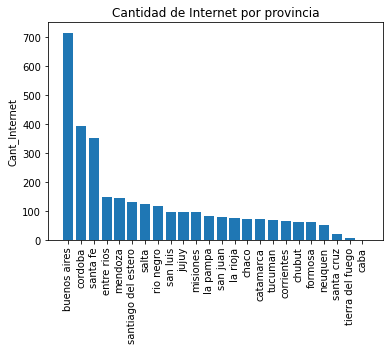

In [65]:
freq = I_tecyloc['provincia'].value_counts()
plt.bar(freq.index, freq.values)
plt.xticks(rotation=90)  # Rotamos los nombres en 90 grados
plt.ylabel('Cant_Internet')
plt.title('Cantidad de Internet por provincia')
plt.show()


Análisis bivariado:

Correlación entre variables numéricas:
Para ver la correlación entre dos variables numéricas en un DataFrame, se puede utilizar el método "corr" de pandas o "heatmap" de seaborn

C:\Users\alumno\AppData\Local\Temp\ipykernel_5480\3911404896.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(I_tecyloc.corr(), annot=True, cmap='coolwarm')


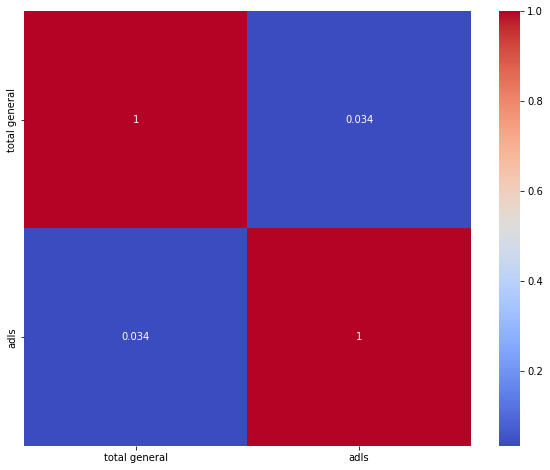

In [75]:
plt.figure(figsize=(10, 8))  # Definimos el tamaño de la figura

# Mapa de calor de correlación con seaborn
sns.heatmap(I_tecyloc.corr(), annot=True, cmap='coolwarm')
plt.show()

Correlación entre variables numéricas y categóricas:
Para ver la correlación entre una variable numérica y una categórica en un DataFrame, se puede utilizar el método "groupby" de pandas o "boxplot" de seaborn:

In [78]:
mean_total = I_tecyloc['total general'].mean()
mean_total

3529.9579885423295

In [77]:
media = I_tecyloc.groupby('provincia')['total general'].mean()
media

provincia
buenos aires           6.594508e+03
caba                   1.547679e+06
catamarca              9.762917e+02
chaco                  1.947919e+03
chubut                 2.631397e+03
cordoba                2.636213e+03
corrientes             2.228400e+03
entre rios             1.793060e+03
formosa                1.105452e+03
jujuy                  1.250768e+03
la pampa               1.415756e+03
la rioja               1.158187e+03
mendoza                1.996710e+03
misiones               1.917442e+03
neuquen                3.078509e+03
rio negro              1.349227e+03
salta                  1.662935e+03
san juan               1.292487e+03
san luis               1.258454e+03
santa cruz             2.250455e+03
santa fe               2.507938e+03
santiago del estero    9.156308e+02
tierra del fuego       7.699429e+03
tucuman                3.869368e+03
Name: total general, dtype: float64

[Text(0, 0, 'buenos aires'),
 Text(1, 0, 'caba'),
 Text(2, 0, 'catamarca'),
 Text(3, 0, 'chaco'),
 Text(4, 0, 'chubut'),
 Text(5, 0, 'cordoba'),
 Text(6, 0, 'corrientes'),
 Text(7, 0, 'entre rios'),
 Text(8, 0, 'formosa'),
 Text(9, 0, 'jujuy'),
 Text(10, 0, 'la pampa'),
 Text(11, 0, 'la rioja'),
 Text(12, 0, 'mendoza'),
 Text(13, 0, 'misiones'),
 Text(14, 0, 'neuquen'),
 Text(15, 0, 'rio negro'),
 Text(16, 0, 'salta'),
 Text(17, 0, 'san juan'),
 Text(18, 0, 'san luis'),
 Text(19, 0, 'santa cruz'),
 Text(20, 0, 'santa fe'),
 Text(21, 0, 'santiago del estero'),
 Text(22, 0, 'tierra del fuego'),
 Text(23, 0, 'tucuman')]

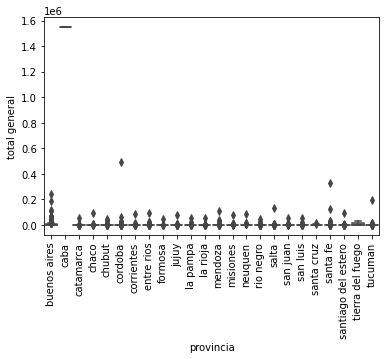

In [80]:
boxplot = sns.boxplot(x='provincia', y='total general', data=I_tecyloc)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90)


Aca se puede observar que cordoba, santa fe y tucuman tienen valores atipicos

In [ ]:
I_tecyloc['provincia']

In [81]:
cordoba = I_tecyloc.loc[I_tecyloc['provincia'] == 'cordoba']
cordoba.describe(exclude='number')

,provincia,partido,localidad,link indec,adsl,cablemodem,dial up,fibra optica,otros,satelital,wimax,wireless,total_tecnologias
count,394,394,394,394,394,394,394,394,394,394,394,394,394
unique,1,27,385,382,163,91,5,109,32,6,2,179,338
top,cordoba,san justo,otros,sin datos,0,0.0,0.0,0.0,- 0,0.0,0.0,0.0,00.00.00.0- 00.00.01.0
freq,394,37,6,6,214,303,389,222,355,321,393,97,11


In [82]:
cordoba.max()

provincia                                 cordoba
partido                                     unión
localidad                     wenceslao escalante
link indec                              sin datos
adsl                                          992
cablemodem                                 9716.0
dial up                                      44.0
fibra optica                                 94.0
otros                                           9
satelital                                     6.0
wimax                                        58.0
wireless                                    993.0
total general                            495182.0
adls                                        992.0
total_tecnologias    9920.00.0365.0- 00.00.0253.0
dtype: object

el valor atipico de cordoba esta en la columna total_tecnologias tiene un valor exagerado 

In [109]:
cordoba.describe()

,adsl,cablemodem,dial up,fibra optica,satelital,wimax,wireless,total general,unnamed: 13,ADSL,adls
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,0.0,394.000000,394.000000
mean,113.475076,1181.373096,0.172589,59.556904,0.253807,0.147208,96.185777,2636.213198,NaN,113.475076,113.475076
std,227.585753,11529.130394,2.349957,168.717045,0.782472,2.921998,162.784977,25276.308825,NaN,227.585753,227.585753
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,36.000000,NaN,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.500000,217.500000,NaN,0.000000,0.000000
75%,94.750000,0.000000,0.000000,3.430500,0.000000,0.000000,110.750000,986.000000,NaN,94.750000,94.750000
max,992.000000,222667.000000,44.000000,917.000000,11.000000,58.000000,993.000000,495182.000000,NaN,992.000000,992.000000


In [ ]:
# Filtro los datos de la provincia "Buenos Aires"
df_co = I_tecyloc[I_tecyloc['provincia'] == 'cordoba']

# Genero un boxplot de la columna "total general"
sns.boxplot(x='total general', data=df_co)

# Identifico los valores que se encuentran fuera de los bigotes del boxplot
q1 = df_co['total general'].quantile(0.25)
q3 = df_co['total general'].quantile(0.75)
iqr = q3 - q1
outliers = df_co[(df_co['total general'] < q1 - 1.5*iqr) | (df_co['total general'] > q3 + 1.5*iqr)]

# Muestro los valores de los outliers
print(outliers)
print('la cantidad e outlier son', outliers.sum())

Analisis por Internet por tecnologias, por provincias en periodod de tiempo

In [28]:
I_portec

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146
4,2022,3,Chubut,45.377,72.212,9.574,29.784,8.831,165.778
...,...,...,...,...,...,...,...,...,...
836,2014,1,Santa Fe,322.662,174.296,3.059,5.951,644.000,506.612
837,2014,1,Santiago Del Estero,32.567,3.598,19,915.000,34.000,37.133
838,2014,1,Tierra Del Fuego,21.618,2.837,648,1.000,2.934,28.038
839,2014,1,Tucumán,129.717,83,121,13.000,98.000,130.032


In [29]:
I_portec.describe(exclude='number')

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Total
count,841,841,840,840,840,840,840
unique,11,8,24,748,729,592,831
top,2021,3,Buenos Aires,22.636,34.984,19,32.557
freq,96,192,35,9,15,17,3


Aca se puede observar que en el tercer trimestre del 2021 la tecnología mas utilizada fue Cablemodem. Un cable módem es un dispositivo que se utiliza para proporcionar servicios de conexión a Internet 
de alta velocidad a través de una conexión de televisión por cable. Funciona como un puente entre
 la red de cable del proveedor de servicios y los dispositivos de la red local, como computadoras,
  tabletas y teléfonos inteligentes.

In [27]:
#me llamó a atencion que trimestre tuviera 8 valores, cuando solo puede tener 4,investigue son datos estimativos
I_portec['Trimestre'].unique()

array(['3', '2', '1', '4', '3 *', '2 *', '1 *',
       'Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.'],
      dtype=object)

In [30]:
I_portec.isna().sum()

Año             0
Trimestre       0
Provincia       1
ADSL            1
Cablemodem      1
Fibra óptica    1
Wireless        1
Otros           1
Total           1
dtype: int64

Hago un calculo de la tecnologia mas utilizada en el último trimestre del 2022, que es el último reporte

In [31]:
# Seleccionar solo los datos del último trimestre del año 2022
ult_trimestre_2022 = I_portec[(I_portec['Año'] == 2022) & (I_portec['Trimestre'] == 4)]

# Calcular la suma total de cada tipo de tecnología
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
total_tecnologias = ult_trimestre_2022[tecnologias].sum()

# Encontrar la tecnología más utilizada en el último trimestre del año 2022
tecnologia_mas_utilizada = total_tecnologias.idxmax()

print("La tecnología más utilizada en el último trimestre del año 2022 fue:", tecnologia_mas_utilizada)


La tecnología más utilizada en el último trimestre del año 2022 fue: ADSL


Analisis de variables númericas.
Grafíco ADSL por timeste en cada provincia

In [33]:
I_portec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           841 non-null    object 
 1   Trimestre     841 non-null    object 
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    object 
 4   Cablemodem    840 non-null    object 
 5   Fibra óptica  840 non-null    object 
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    object 
dtypes: float64(2), object(7)
memory usage: 59.3+ KB


In [40]:
#debo pasarlas a float a las variables numéricas
I_portec['ADSL'] = I_portec['ADSL'].astype('float')

In [37]:
#cuando vuelva a correr hacerlo asi, y borrar el de abajo
I_portec['ADSL'] = I_portec['ADSL'].str.replace('.','')

C:\Users\alumno\AppData\Local\Temp\ipykernel_8264\1356257651.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  I_portec['ADSL'] = I_portec['ADSL'].str.replace('.',' ')


In [39]:
I_portec['ADSL'] = I_portec['ADSL'].str.replace(' ','')

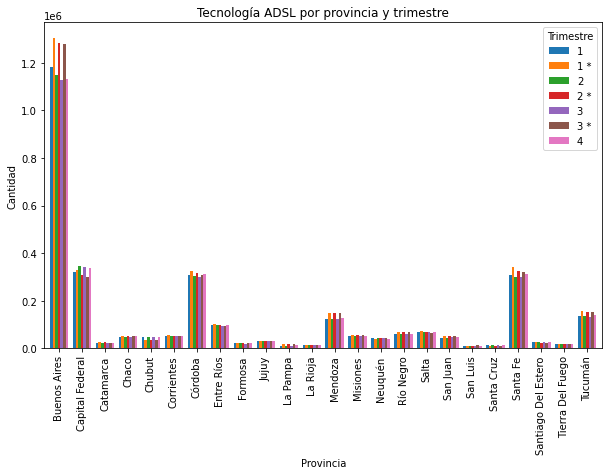

In [123]:



# Crear un DataFrame con los datos de la tecnología "ADSL" solamente
ADSL_por_provincia = I_portec[['Provincia', 'Trimestre', 'ADSL']]

# Utilizar "pivot table" para obtener los datos en un formato adecuado para graficar
ADSL_por_provincia_trimestre = ADSL_por_provincia.pivot_table(index='Provincia', columns='Trimestre', values='ADSL')

# Graficar los datos utilizando un gráfico de barras agrupadas por provincia
ADSL_por_provincia_trimestre.plot(kind='bar', figsize=(10,6), width=0.8)

# Agregar título y etiquetas de eje
plt.title('Tecnología ADSL por provincia y trimestre')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')

# Mostrar la gráfica
plt.show()


In [49]:
I_portec['Cablemodem'] = I_portec['Cablemodem'].str.replace('.','')

C:\Users\alumno\AppData\Local\Temp\ipykernel_8264\3922990139.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  I_portec['Cablemodem'] = I_portec['Cablemodem'].str.replace('.','')


In [50]:
I_portec['Cablemodem'] = I_portec['Cablemodem'].astype('float')

In [51]:
I_portec['Fibra óptica'] = I_portec['Fibra óptica'].str.replace('.','')

C:\Users\alumno\AppData\Local\Temp\ipykernel_8264\3363244417.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  I_portec['Fibra óptica'] = I_portec['Fibra óptica'].str.replace('.','')


In [52]:
I_portec['Fibra óptica'] = I_portec['Fibra óptica'].astype('float')

In [55]:
I_portec['Wireless'].head()

0    126.846
1      5.758
2      1.329
3      8.178
4     29.784
Name: Wireless, dtype: float64

In [56]:
I_portec['Wireless'] = I_portec['Wireless'].replace('.','')

In [57]:
I_portec['Otros'] = I_portec['Otros'].replace('.','')

In [64]:
I_portec['Total'] = I_portec['Total'].str.replace('.','')

C:\Users\alumno\AppData\Local\Temp\ipykernel_8264\3073396341.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  I_portec['Total'] = I_portec['Total'].str.replace('.','')


In [65]:
I_portec['Total'] = I_portec['Total'].astype('float')

grafica de los utimos dos trimestre de ADLS en cada provincia

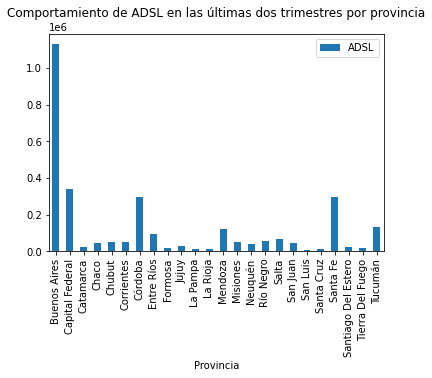

In [67]:
df = I_portec
# Seleccionar los últimos dos trimestres
last_two_quarters = df[df['Trimestre'].isin(['3', '*3'])]

# Seleccionar solo la columna de la provincia y ADSL
adsl_by_province = last_two_quarters[['Provincia', 'ADSL']]

# Agrupar los datos por provincia y calcular el promedio de ADSL
mean_adsl_by_province = adsl_by_province.groupby('Provincia').mean()

# Graficar los resultados
mean_adsl_by_province.plot(kind='bar', title='Comportamiento de ADSL en las últimas dos trimestres por provincia')
plt.show()


Analisis de Internet por velocidad y provincia

In [68]:
I_BaF.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,3,11.078.691,12.437,11.091.128,Jul-Sept 2022
1,2022,2,10.946.248,12.436,10.958.684,Abr-Jun 2022
2,2022,1,10.611.390,12.619,10.624.009,Ene-Mar 2022
3,2021,4,10.476.933,12.861,10.489.794,Oct-Dic 2021
4,2021,3,10.075.184,10.357,10.085.541,Jul-Sept 2021


In [69]:
I_BaF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               35 non-null     int64  
 1   Trimestre         35 non-null     int64  
 2   Banda ancha fija  35 non-null     object 
 3   Dial up           35 non-null     float64
 4   Total             35 non-null     object 
 5   Periodo           35 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ KB


In [70]:
I_BaF.describe(exclude='number')

,Banda ancha fija,Total,Periodo
count,35,35,35
unique,35,35,35
top,11.078.691,11.091.128,Jul-Sept 2022
freq,1,1,1


Transformaciones pertinentes en cada columna

In [89]:
I_BaF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               35 non-null     int64  
 1   Trimestre         35 non-null     int64  
 2   Banda ancha fija  35 non-null     float64
 3   Dial up           35 non-null     float64
 4   Total             35 non-null     float64
 5   Periodo           35 non-null     object 
dtypes: float64(3), int64(2), object(1)
memory usage: 1.8+ KB


In [72]:
I_BaF['Banda ancha fija'] = I_BaF['Banda ancha fija'].str.replace('.','')

C:\Users\alumno\AppData\Local\Temp\ipykernel_8264\3384275551.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  I_BaF['Banda ancha fija'] = I_BaF['Banda ancha fija'].str.replace('.','')


In [73]:
I_BaF['Banda ancha fija'] = I_BaF['Banda ancha fija'].astype('float')

In [74]:
I_BaF['Total'] = I_BaF['Total'].str.replace('.','')

C:\Users\alumno\AppData\Local\Temp\ipykernel_8264\275932862.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  I_BaF['Total'] = I_BaF['Total'].str.replace('.','')


In [75]:
I_BaF['Total'] = I_BaF['Total'].astype('float')

In [98]:
I_BaF['Periodo'] = I_BaF['Periodo'].str.lower()

In [ ]:
I_BaF['Periodo'] = I_BaF['Periodo']

In [108]:
df['Periodo'] = df['Periodo'].str.replace('sept', 'sep') 

In [113]:
#quiero pasar la columna Periodo a datetime pero no puedo intente de mil formas
I_BaF['Periodo'] = pd.to_datetime(I_BaF['Periodo'], format='%b-%b %Y')

error: redefinition of group name 'b' as group 2; was group 1 at position 59

In [118]:
df = I_BaF
# Convertir la columna 'Periodo' a tipo datetime
periodos = df['Periodo'].str.split(' ',expand=True)
#periodos[1] = periodos[1].str.replace('Sept', 'Sep')
periodos = periodos[0] + ' ' + periodos[1] #+ ' ' + periodos[2]
periodos = pd.PeriodIndex(periodos, freq='Q')
df['Periodo'] = periodos.to_timestamp()

# Imprimir el dataframe resultante
print(df)


DateParseError: Unknown datetime string format, unable to parse: JUL-SEP 2022

Analisis de 

In [119]:
I_loc_conint.head()

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,--,--,--,--,SI,SI,--,--,--
1,BUENOS AIRES,Bahía Blanca,Villa Espora,--,--,--,--,--,--,--,--,--
2,BUENOS AIRES,Balcarce,Balcarce,SI,SI,SI,SI,SI,SI,SI,SI,--
3,BUENOS AIRES,Balcarce,Los Pinos,--,--,--,--,--,--,SI,SI,--
4,BUENOS AIRES,Balcarce,Napaleofú,--,--,--,SI,SI,SI,SI,SI,--


In [121]:
I_loc_conint.describe()

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
count,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312
unique,24,444,3912,2,2,2,2,2,2,2,2,2
top,BUENOS AIRES,General Roca,San Pedro,--,--,--,--,SI,--,SI,SI,--
freq,901,85,12,3179,3436,3909,2866,2574,2432,2162,2242,3233
